In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


TFile**		test_file.root	
 TFile*		test_file.root	
  KEY: RooDataSet	ds_k;1	Ostap.Selectors/ds_1000 
  KEY: TProcessID	ProcessID0;1	4de99c20-f0e9-11e9-ba22-e368b8bcbeef
  KEY: RooDataSet	ds_pi;1	Ostap.Selectors/ds_1000 


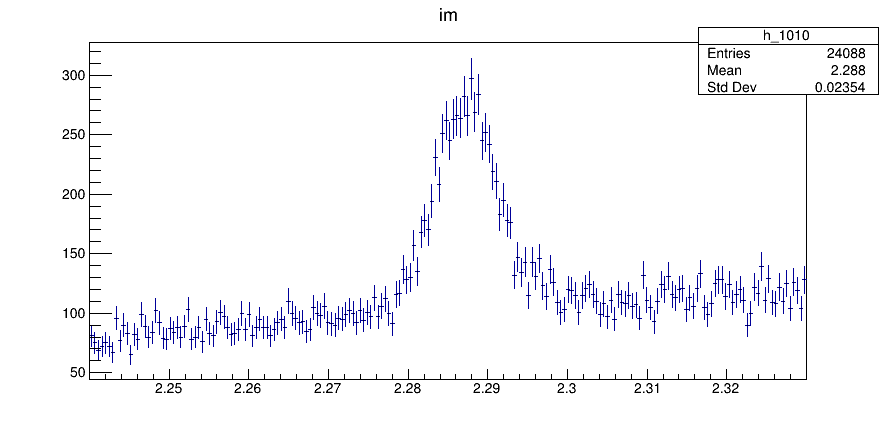

In [2]:
canv = ROOT.TCanvas("canv","canv",900,450)
im  = ROOT.RooRealVar("im" ,"im" , 2.24, 2.33)
lgi = ROOT.RooRealVar("lgi","lgi",-2.0, 2.0)
arg_set = ROOT.RooArgSet(im, lgi)
cut = "im>2.24 && im<2.33 && lgi>-2. && lgi<2. && NNp>0.5"
rfile = ROOT.TFile("test_file.root","READ")
rfile.ls()
small_ds = rfile["ds_k"].reduce( arg_set, cut)
small_ds.draw("im")
canv.Draw()

In [3]:
lgi_bins = []
LGI = 40
for i in range(LGI+1):
    lgi_bins.append(-2.0 + 4.*i/LGI)

# Fit1D(Fitsig)                    WARNING fitTo: covQual    is  2/full matrix but forced pos def 



  RooFitResult: minimized FCN value: -278485, estimated distance to minimum: 8.02167
                covariance matrix quality: Full matrix, but forced positive-definite
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                     B    1.0000e+00    2.0019e+04 +/-  1.04e+02  0.237872
                     S    1.0000e+00    4.0688e+03 +/-  6.60e+01  0.406640
              asym_sig    0.0000e+00   -9.9776e-02 +/-  1.96e-01  0.998537
              beta_sig    1.0000e+00    1.7002e+00 +/-  1.37e-01  0.521318
              mean_sig    2.2870e+00    2.2868e+00 +/-  1.89e-03  0.998509
             sigma_sig    4.5000e-03    3.5999e-03 +/-  7.28e-05  0.503115
               tau_bkg    0.0000e+00    4.3625e+00 +/-  3.81e-01  0.874170




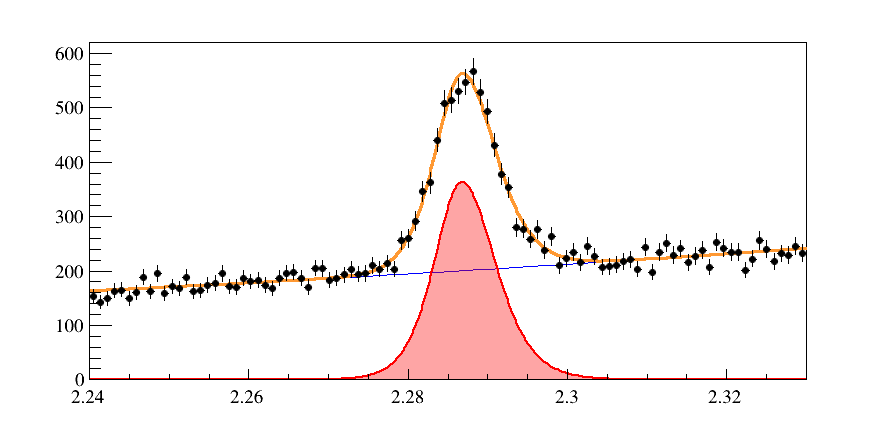

In [4]:
sig = Models.Apollonios2_pdf("sig",xvar=im,mean=(2.287,2.286,2.289),sigma=(0.0045,0.003,0.008),asymmetry=(0.,-0.1,0.1),beta=(1,0.1,20.))
bkg = Models.Bkg_pdf("bkg", xvar=im, power=0)
model = Models.Fit1D(signal=sig, background=bkg)
small_dh = small_ds.reduce(ROOT.RooArgSet(im)).binnedClone()
r,w = model.fitTo(small_dh, draw=True, silent=True)
print(r)
w.Draw()
canv.Draw()

# Fit1D(FitsigF)                   WARNING The variable name "S" is already defined!
# Fit1D(FitsigF)                   WARNING The variable name "B" is already defined!



  RooFitResult: minimized FCN value: -278485, estimated distance to minimum: 1.98892e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Constant Parameter    Value     
  --------------------  ------------
             asym_sigF   -9.9776e-02
             beta_sigF    1.7002e+00
             mean_sigF    2.2868e+00
            sigma_sigF    3.5999e-03

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                     B    1.0000e+00    2.0018e+04 +/-  1.58e+02  0.323919
                     S    1.0000e+00    4.0715e+03 +/-  9.42e+01  0.323931
              tau_bkgF    0.0000e+00    4.3691e+00 +/-  2.74e-01  0.003906




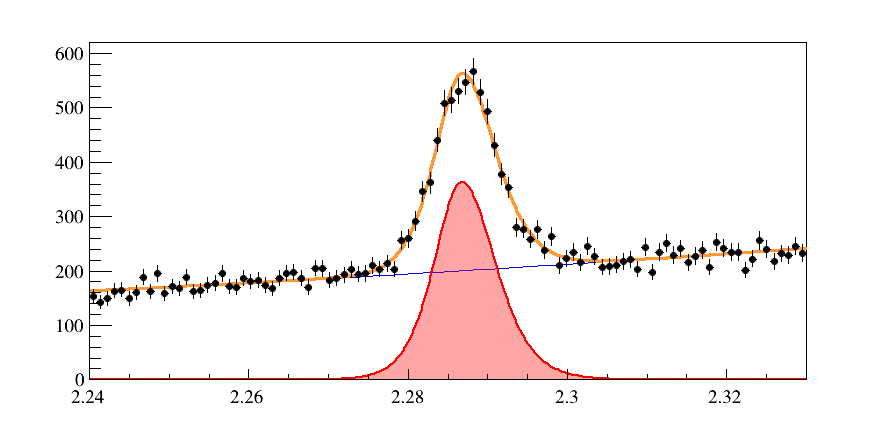

In [5]:
p_mean = r("mean_sig")[0].value()
p_sigma= r("sigma_sig")[0].value()
p_asym = r("asym_sig")[0].value()
p_beta = r("beta_sig")[0].value()
sigF = Models.Apollonios2_pdf("sigF", xvar=im, mean=p_mean, sigma=p_sigma, asymmetry=p_asym, beta=p_beta)
bkgF = Models.Bkg_pdf("bkgF", xvar=im, power=0)
modelF = Models.Fit1D(signal=sigF, background=bkgF)
rF,wF = modelF.fitTo(small_dh, draw=True, silent=True)
print(rF)
wF.Draw()
canv.Draw()

In [9]:
h_fit = h1_axis(lgi_bins)
for b in range(len(lgi_bins)-1):
    slice_cut = "lgi>"+str(lgi_bins[b])+" && lgi<"+str(lgi_bins[b+1])
    slice_ds = small_ds.reduce(ROOT.RooArgSet(im),slice_cut)
    r_slice, w_slice = modelF.fitTo(slice_ds, draw=True, silent=True)
    print( "Bin " + str(b) + "  -->  " + str(r_slice("S")[0]) + " signal events")
    h_fit[b+1] = r_slice("S")[0]

Bin 0  -->  ( 2.02851 +- 1.7728 ) signal events
Bin 1  -->  ( 2.39006 +- 2.02009 ) signal events
Bin 2  -->  ( 8.16741 +- 3.12833 ) signal events
Bin 3  -->  ( 3.49393 +- 2.30917 ) signal events
Bin 4  -->  ( 7.27187 +- 3.40374 ) signal events
Bin 5  -->  ( 6.06693 +- 3.12501 ) signal events
Bin 6  -->  ( 5.43101 +- 3.36528 ) signal events
Bin 7  -->  ( 18.1079 +- 5.05348 ) signal events
Bin 8  -->  ( 17.5087 +- 5.14272 ) signal events
Bin 9  -->  ( 20.8938 +- 5.43606 ) signal events
Bin 10  -->  ( 25.7953 +- 6.39977 ) signal events
Bin 11  -->  ( 37.8546 +- 7.32153 ) signal events
Bin 12  -->  ( 43.2541 +- 8.07738 ) signal events
Bin 13  -->  ( 49.3413 +- 8.64619 ) signal events
Bin 14  -->  ( 83.4288 +- 10.5769 ) signal events
Bin 15  -->  ( 93.6755 +- 11.397 ) signal events
Bin 16  -->  ( 92.3341 +- 11.9513 ) signal events
Bin 17  -->  ( 128.007 +- 13.7861 ) signal events
Bin 18  -->  ( 150.601 +- 14.928 ) signal events
Bin 19  -->  ( 159.49 +- 16.0897 ) signal events
Bin 20  -->  (

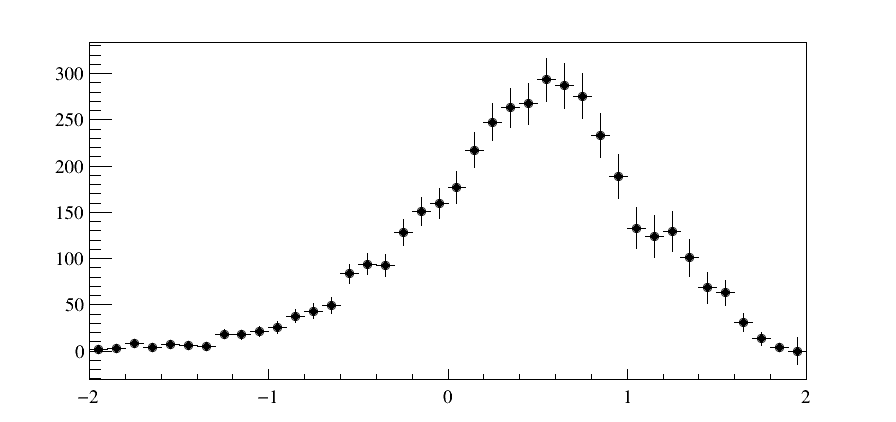

In [10]:
h_fit.Draw()
canv.Draw()


  RooFitResult: minimized FCN value: -278484, estimated distance to minimum: 1.34577e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Constant Parameter    Value     
  --------------------  ------------
              asym_sig   -9.9776e-02
              beta_sig    1.7002e+00
              mean_sig    2.2868e+00
             sigma_sig    3.5999e-03
               tau_bkg    4.3625e+00

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                     B    2.0019e+04    2.0020e+04 +/-  1.58e+02  0.323907
                     S    4.0688e+03    4.0698e+03 +/-  9.42e+01  0.323907




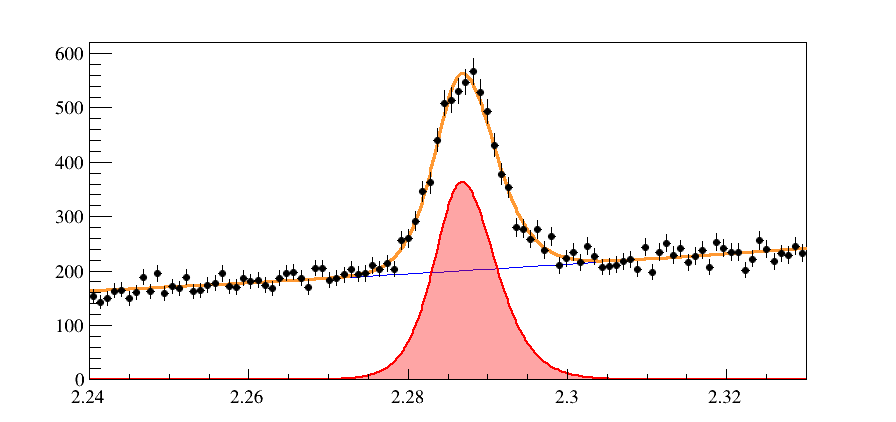

In [11]:
model.signal.mean.fix()
model.signal.sigma.fix()
model.signal.asym.fix()
model.signal.beta.fix()
model.background.tau.fix()
r,w = model.fitTo(small_ds, draw=True, silent=True)
print(r)
w.Draw()
canv.Draw()

+RooDataSet("ds_1000","Ostap.Selectors/ds_1000 "):24089 entries, 6 variables--+
|   Variable    |  Description  |   mean   |   rms    |     min     |   max   |
+---------------+---------------+----------+----------+-------------+---------+
| 1. B_sw       | B_sw          | +0.83105 | 0.58325  |    -0.32009 | +1.2403 |
| 2. L_B        | L_B           |  +11.238 | 1.1467   |     +9.0725 | +13.435 |
| 3. L_S        | L_S           |  +20.512 | 32.957   | +3.2994e-08 | +99.066 |
| 4. S_sw       | S_sw          | +0.16896 | 0.58319  |    -0.24032 | +1.3201 |
| 5. im         | im            |  +2.2879 | 0.025443 |       +2.24 | +2.33   |
| 6. lgi        | lgi           | +0.74354 | 0.58794  |     -1.9841 | +1.9942 |
+---------------+---------------+----------+----------+-------------+---------+
( 407.119 +- 9.49634 )
( 407 +- 9.42384 )


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


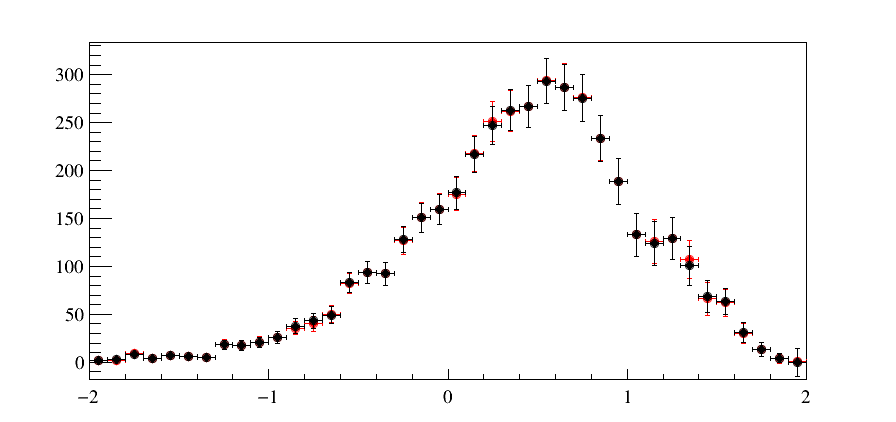

In [13]:
model.sPlot( small_ds )
print(small_ds)
h_sPlot = h1_axis(lgi_bins).red()
h_sPlot.Sumw2()
for entry in small_ds:
    h_sPlot.Fill(entry.lgi,entry.S_sw)
print(h_fit.integrate())
print(h_sPlot.integrate())
h_Fit = h_fit.clone()*h_sPlot.integrate().value()/h_fit.integrate().value()
h_sPlot.Draw("e1")
h_Fit.Draw("same e1")
canv.Draw()